<a href="https://colab.research.google.com/github/chadloh/GoogleDecimeterChallenge/blob/main/CarolineKeough/Madgwick_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install ahrs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 4.2 MB/s 


In [9]:
import math
import numpy as np
from cv2 import Rodrigues
from math import sin, cos, atan2, sqrt
import pandas as pd
from pathlib import Path
import ahrs

In [2]:
#Select files to train. Try to have different locations, routes, phones
#LAX, MTV, SJC, SVL, SFO

data_dir = Path('/content/drive/MyDrive/Google_decimeter/smartphone-decimeter-2022')

train1 = Path('2021-12-28-US-MTV-1/SamsungGalaxyS20Ultra')
train2 = Path('2021-12-15-US-MTV-1/GooglePixel5')
train3 = Path('2021-12-09-US-LAX-2/GooglePixel6Pro')
train4 = Path('2021-12-08-US-LAX-5/XiaomiMi8')
train5 = Path('2021-08-24-US-SVL-1/GooglePixel4')
train6 = Path('2021-08-04-US-SJC-1/GooglePixel5')
train7 = Path('2021-07-27-US-MTV-1/XiaomiMi8')
train8 = Path('2021-04-26-US-SVL-2/SamsungGalaxyS20Ultra')
train9 = Path('2021-04-29-US-MTV-2/SamsungGalaxyS20Ultra')
train10 = Path('2021-01-04-US-SFO-2/GooglePixel5') #this one won't have orientation deg

In [4]:
imu_train1 = pd.read_csv(data_dir / 'train' / train1 / 'device_imu.csv')

In [5]:
imu_train1.head()

,MessageType,utcTimeMillis,MeasurementX,MeasurementY,MeasurementZ,BiasX,BiasY,BiasZ
0,UncalGyro,1640722632003,0.000153,0.001756,-0.001069,0.0,0.00,0.00
1,UncalMag,1640722632003,81.659996,-57.780000,-32.100000,51.0,-14.88,-56.76
2,UncalAccel,1640722632004,-0.153229,9.665691,-2.063802,0.0,0.00,0.00
3,UncalMag,1640722632013,81.900000,-58.379997,-31.679998,51.0,-14.88,-56.76
4,UncalAccel,1640722632014,-0.117316,9.531616,-2.023100,0.0,0.00,0.00


In [10]:
from ahrs.filters import Madgwick

In [37]:
gyro = imu_train1[imu_train1['MessageType'] == 'UncalGyro']
gyro = gyro.drop(columns = ['BiasX', 'BiasY', 'BiasZ', 'MessageType'])
gyro = gyro.rename(columns = {'MeasurementX': 'GyroX', 'MeasurementY': 'GyroY', 'MeasurementZ': 'GyroZ'})

In [38]:
accel = imu_train1[imu_train1['MessageType'] == 'UncalAccel']
accel = accel.drop(columns = ['BiasX', 'BiasY', 'BiasZ', 'MessageType'])
accel = accel.rename(columns = {'MeasurementX': 'AccelX', 'MeasurementY': 'AccelY', 'MeasurementZ': 'AccelZ'})

In [43]:
mag = imu_train1[imu_train1['MessageType'] == 'UncalMag'].copy()
mag['MagX'] = mag['MeasurementX'] - mag['BiasX']
mag['MagY'] = mag['MeasurementY'] - mag['BiasY']
mag['MagZ'] = mag['MeasurementZ'] - mag['BiasZ']
mag = mag.drop(columns = ['MeasurementX', 'MeasurementY', 'MeasurementZ', 'BiasX', 'BiasY', 'BiasZ', 'MessageType'])

In [45]:
imu_df = pd.merge_asof(gyro.sort_values('utcTimeMillis'),
                        accel.sort_values('utcTimeMillis'),
                        on = 'utcTimeMillis',
                        direction='nearest')

In [48]:
imu_df = pd.merge_asof(imu_df.sort_values('utcTimeMillis'),
                        mag.sort_values('utcTimeMillis'),
                        on = 'utcTimeMillis',
                        direction='nearest')

In [67]:
sampling_step = ((imu_df['utcTimeMillis'].max() - imu_df['utcTimeMillis'].min())/len(imu_df))/1000

In [58]:
gyro_data = np.array(imu_df[['GyroX', 'GyroY', 'GyroZ']])
acc_data = np.array(imu_df[['AccelX', 'AccelY', 'AccelZ']])
mag_data = np.array(imu_df[['MagX', 'MagY', 'MagZ']])


In [71]:
madgwick = Madgwick(gyr=gyro_data, acc=acc_data, mag=mag_data, gain_imu=0.01, gain_marg=0.05, Dt = sampling_step)
#  N-by-3 array with measurements of angular velocity in rad/s


In [82]:
madgwick_df = pd.DataFrame(madgwick.Q)


In [83]:
madgwick_df

,0,1,2,3
0,0.334828,0.402730,0.664905,0.532541
1,0.335295,0.402584,0.664856,0.532420
2,0.335738,0.402487,0.664852,0.532218
3,0.336187,0.402371,0.664813,0.532071
4,0.336646,0.402226,0.664788,0.531921
...,...,...,...,...
80749,0.615553,0.761898,0.161929,0.119932
80750,0.615982,0.761452,0.162375,0.119963
80751,0.615497,0.761801,0.162551,0.119999
80752,0.615878,0.761488,0.162268,0.120413


In [86]:
pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 1.6 MB/s 


In [87]:
import pygame

pygame 2.1.2 (SDL 2.0.16, Python 3.7.13)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [88]:
#well does the 1 2 columns make a plot?

pygame.draw.line(screen, (255,0,255), (20,20), (70,80), 2)


NameError: ignored

In [94]:
madgwick_df[1][1:1000]

1      0.402584
2      0.402487
3      0.402371
4      0.402226
5      0.402134
         ...   
995    0.450375
996    0.450483
997    0.450151
998    0.449949
999    0.449603
Name: 1, Length: 999, dtype: float64

In [96]:
madgwick_df[2][0:1000]

0      0.664905
1      0.664856
2      0.664852
3      0.664813
4      0.664788
         ...   
995    0.632711
996    0.633067
997    0.633169
998    0.633422
999    0.633627
Name: 2, Length: 1000, dtype: float64

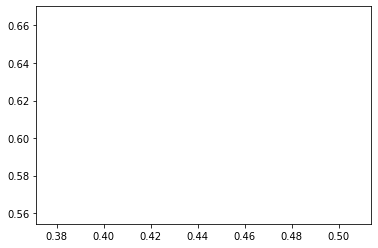

In [95]:
import matplotlib.pyplot as plt
plt.plot([madgwick_df[1][0:1000]],[madgwick_df[2][0:1000]])
plt.show()